In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel(r'C:\Users\basia\OneDrive\Pulpit\DTU\ML\Project 1\output.xlsx')


In [3]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]
y_reset = y.reset_index(drop=True)

In [4]:
X= (X-np.mean(X,axis=0))/np.std(X,axis=0)

# Classification problem

In [5]:
X.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.935331,0.870515,-0.957810,-0.667499,0.340543,-0.125517,-0.054242,-1.336364,1.680267
1,-1.930669,-0.392251,0.504173,-0.834249,-0.819098,0.020810,0.227123,-1.326788,0.110012
2,-1.921344,-1.023635,0.149753,0.833250,0.243906,-0.888511,2.009102,-1.323597,-0.622774
3,-1.902695,-0.707943,-1.179322,0.666500,-0.142640,-1.108002,0.352174,-1.285294,-0.832141
4,-1.893371,-0.076560,0.105451,0.333001,-1.302281,-0.345009,-0.945231,-1.266143,-0.622774


In [6]:
y

,Outcome
0,0
1,0
2,0
3,0
4,0
...,...
329,1
330,1
331,1
332,0


In [7]:
X.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.935331,0.870515,-0.957810,-0.667499,0.340543,-0.125517,-0.054242,-1.336364,1.680267
1,-1.930669,-0.392251,0.504173,-0.834249,-0.819098,0.020810,0.227123,-1.326788,0.110012
2,-1.921344,-1.023635,0.149753,0.833250,0.243906,-0.888511,2.009102,-1.323597,-0.622774
3,-1.902695,-0.707943,-1.179322,0.666500,-0.142640,-1.108002,0.352174,-1.285294,-0.832141
4,-1.893371,-0.076560,0.105451,0.333001,-1.302281,-0.345009,-0.945231,-1.266143,-0.622774


In [8]:
del X["Unnamed: 0"]

## Logistic regression

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


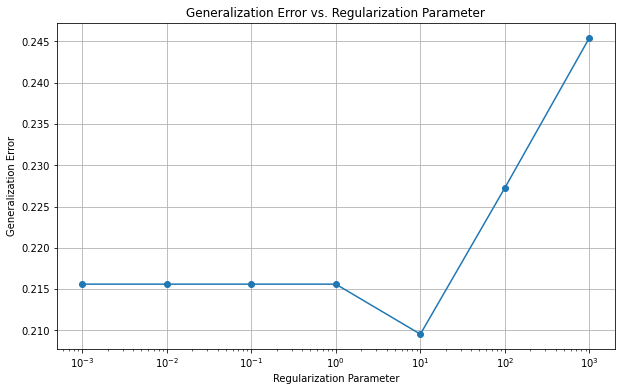

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt

# Assuming you have a dataset with features X and target variable y

# Define a range of regularization parameters (lambda values) from 10^-3 to 10^3
lambda_values = np.logspace(-3, 3, 7)


# Initialize logistic regression model with cross-validation
log_reg_model = LogisticRegressionCV(Cs=1/lambda_values, cv=10)

# Fit the model to the data
log_reg_model.fit(X, y)

# Get the estimated generalization error for each lambda
generalization_errors = 1 - np.array(log_reg_model.scores_[1].mean(axis=0))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, generalization_errors, marker='o')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('Regularization Parameter')
plt.ylabel('Generalization Error')
plt.title('Generalization Error vs. Regularization Parameter')
plt.grid(True)
plt.show()


In [12]:
#1- estimated accuracy score for each regularization param
log_reg_model.scores_[1].mean(axis=0)


array([0.78440285, 0.78440285, 0.78440285, 0.78440285, 0.79046346,
       0.77272727, 0.75454545])

In [13]:
#1- estimated generalization error for each regularization param
1-log_reg_model.scores_[1].mean(axis=0)

array([0.21559715, 0.21559715, 0.21559715, 0.21559715, 0.20953654,
       0.22727273, 0.24545455])

###  Logististic regression: Optimal Lambda for each fold 

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
import numpy as np

# Define the range of regularization values (lambda)
lambda_values = np.logspace(-3, 3, 7)

for fold, (train_idx, test_idx) in enumerate(StratifiedKFold(n_splits=10).split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Initialize a list to store errors for different lambdas
    errors_for_lambdas = []

    for lambda_val in lambda_values:
        # Create Logistic Regression model with current lambda value
        log_reg_model = LogisticRegressionCV(Cs=[1/lambda_val], cv=10)
        
        # Fit the model on the training data
        reg_model_fold = log_reg_model.fit(X_train, y_train)

        # Predict on the test data
        y_pred_fold = reg_model_fold.predict(X_test)

        # Calculate confusion matrix for the fold
        conf_matrix_fold = confusion_matrix(y_test, y_pred_fold)

        # Extract FP, FN, and TN from the confusion matrix
        FP = conf_matrix_fold[0, 1] if len(np.unique(y_test)) > 1 else 0
        FN = conf_matrix_fold[1, 0] if len(np.unique(y_test)) > 1 else 0

        # Calculate error for the fold
        error_fold = (FP + FN) / len(y_test)

        # Store error for the current lambda value
        errors_for_lambdas.append((lambda_val, error_fold))

    # Find the optimal lambda and corresponding lowest error for the current fold
    optimal_lambda, lowest_error = min(errors_for_lambdas, key=lambda x: x[1])

    print(f'Fold {fold + 1}: Optimal Lambda = {optimal_lambda:.4f}, Lowest Error = {lowest_error:.2%}')


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

Fold 1: Optimal Lambda = 0.0010, Lowest Error = 20.59%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

Fold 2: Optimal Lambda = 0.0010, Lowest Error = 17.65%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

Fold 3: Optimal Lambda = 10.0000, Lowest Error = 26.47%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

Fold 4: Optimal Lambda = 0.0010, Lowest Error = 17.65%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

Fold 5: Optimal Lambda = 0.0010, Lowest Error = 18.18%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

Fold 6: Optimal Lambda = 0.0010, Lowest Error = 21.21%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

Fold 7: Optimal Lambda = 0.0010, Lowest Error = 12.12%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

Fold 8: Optimal Lambda = 10.0000, Lowest Error = 15.15%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

Fold 9: Optimal Lambda = 0.0010, Lowest Error = 21.21%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

Fold 10: Optimal Lambda = 100.0000, Lowest Error = 18.18%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the range of values for n_neighbors
param_grid = {'n_neighbors': [1, 3, 5, 7, 10, 15, 20]}

# Initialize KNN with GridSearchCV for parameter tuning
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, param_grid, cv=10)
#Using GridSearchCV, you systematically search through different values of n_neighbors to find the one that yields the best performance.
knn_grid.fit(X, y)

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 10, 15, 20]})

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

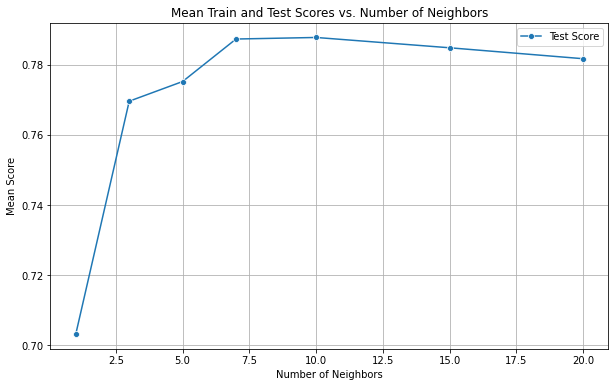

Best Number of Neighbors: 10
Corresponding Mean Test Score: 0.7877896613190731


In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
results = knn_grid.cv_results_
neighbors = param_grid['n_neighbors']

# Initialize KNN with GridSearchCV for parameter tuning
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, param_grid, cv=10, return_train_score=True)
knn_grid.fit(X, y)

# Extract the results
results = knn_grid.cv_results_
neighbors = param_grid['n_neighbors']

# Plot the mean train and test scores
plt.figure(figsize=(10, 6))
#sns.lineplot(x=neighbors, y=results['mean_train_score'], marker='o', label='Train Score')
sns.lineplot(x=neighbors, y=results['mean_test_score'], marker='o', label='Test Score')
plt.title('Mean Train and Test Scores vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Score')
plt.legend()
plt.grid(True)
plt.show()

# Print the best parameters and corresponding score
best_neighbors = knn_grid.best_params_['n_neighbors']
best_score = knn_grid.best_score_
print(f'Best Number of Neighbors: {best_neighbors}')
print(f'Corresponding Mean Test Score: {best_score}')

### KNN optimal neighbours and error for each fold

In [17]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Define the range of neighbors
param_grid = {'n_neighbors': [1, 3, 5, 7, 10, 15, 20]}

for fold, (train_idx, test_idx) in enumerate(StratifiedKFold(n_splits=10).split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Initialize a list to store errors for different neighbors
    neigh_values = []

    for neigh_value in param_grid['n_neighbors']:
        # Create KNeighborsClassifier with current neighbor value
        neigh = KNeighborsClassifier(n_neighbors=neigh_value)

        # Perform cross-validated predictions
        y_pred = cross_val_predict(neigh, X, y, cv=10)

        # Predict on the test data
        y_true_fold = y.iloc[test_idx]
        y_pred_fold = y_pred[test_idx]
        conf_matrix_fold = confusion_matrix(y_true_fold, y_pred_fold)

        # Extract FP, FN, and TN from the confusion matrix
        FP = conf_matrix_fold[0, 1] if len(np.unique(y_test)) > 1 else 0
        FN = conf_matrix_fold[1, 0] if len(np.unique(y_test)) > 1 else 0

        # Calculate error for the fold
        error_fold = (FP + FN) / len(y_test)

        # Store error for the current neighbor value
        neigh_values.append((neigh_value, error_fold))

    # Find the optimal neighbor and corresponding lowest error for the current fold
    optimal_neighbor, lowest_error = min(neigh_values, key=lambda x: x[1])

    print(f'Fold {fold + 1}: Optimal Neighbor = {optimal_neighbor}, Lowest Error = {lowest_error:.2%}')


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

Fold 1: Optimal Neighbor = 5, Lowest Error = 14.71%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

Fold 2: Optimal Neighbor = 7, Lowest Error = 14.71%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

Fold 3: Optimal Neighbor = 1, Lowest Error = 26.47%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

Fold 4: Optimal Neighbor = 5, Lowest Error = 20.59%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

Fold 5: Optimal Neighbor = 3, Lowest Error = 18.18%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

Fold 6: Optimal Neighbor = 3, Lowest Error = 18.18%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

Fold 7: Optimal Neighbor = 1, Lowest Error = 15.15%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

Fold 8: Optimal Neighbor = 10, Lowest Error = 12.12%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

Fold 9: Optimal Neighbor = 10, Lowest Error = 18.18%


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

Fold 10: Optimal Neighbor = 15, Lowest Error = 21.21%


In [18]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.870515,-0.957810,-0.667499,0.340543,-0.125517,-0.054242,-1.336364,1.680267
1,-0.392251,0.504173,-0.834249,-0.819098,0.020810,0.227123,-1.326788,0.110012
2,-1.023635,0.149753,0.833250,0.243906,-0.888511,2.009102,-1.323597,-0.622774
3,-0.707943,-1.179322,0.666500,-0.142640,-1.108002,0.352174,-1.285294,-0.832141
4,-0.076560,0.105451,0.333001,-1.302281,-0.345009,-0.945231,-1.266143,-0.622774
...,...,...,...,...,...,...,...,...
329,-0.707943,0.637081,2.334000,1.210274,-0.836251,-0.054242,2.608795,0.319379
330,2.448972,1.833248,0.499750,-0.046004,0.125330,0.148966,2.710935,2.203686
331,-1.023635,0.637081,-0.167249,-0.915734,0.438889,-0.288713,2.832227,-0.518090
332,-0.392251,-1.400835,-1.501249,-0.625824,-0.240489,-0.601341,3.815324,-0.518090


# Baseline model

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# Create a DummyClassifier predicting the majority class
baseline_model = DummyClassifier(strategy='most_frequent')

# Perform cross-validated predictions
y_pred_baseline = cross_val_predict(baseline_model, X, y, cv=10)

# Calculate error for each fold
for fold, (train_idx, test_idx) in enumerate(StratifiedKFold(n_splits=10).split(X, y)):
    y_true_fold = y.iloc[test_idx]
    y_pred_fold = y_pred_baseline[test_idx]
    
    # Calculate confusion matrix for the fold
    conf_matrix_fold = confusion_matrix(y_true_fold, y_pred_fold)
    
    # Extract FP, FN, and TN from the confusion matrix
    FP = conf_matrix_fold[0, 1] if len(np.unique(y_true_fold)) > 1 else 0
    FN = conf_matrix_fold[1, 0] if len(np.unique(y_true_fold)) > 1 else 0
    
    # Calculate error for the fold
    error_fold = (FP + FN) / len(y_true_fold)
    
    print(f'Fold {fold + 1}: Error = {error_fold:.2%}')



Fold 1: Error = 23.53%
Fold 2: Error = 23.53%
Fold 3: Error = 26.47%
Fold 4: Error = 26.47%
Fold 5: Error = 24.24%
Fold 6: Error = 24.24%
Fold 7: Error = 24.24%
Fold 8: Error = 24.24%
Fold 9: Error = 24.24%
Fold 10: Error = 24.24%


In [20]:
y

,Outcome
0,0
1,0
2,0
3,0
4,0
...,...
329,1
330,1
331,1
332,0


# All models: optimal hyperparameter, error and confidence interval

In [27]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
# Define models and their parameter grids
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 10, 15, 20]}),
    'Baseline': (DummyClassifier(strategy='most_frequent'), {})
}

# Outer loop: Split data into training and test sets
X_train_outer, X_test_outer, y_train_outer, y_test_outer = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a table to store results
results_table = {'Model': [], 'Selected Parameter': [], 'Error Rate': [], 'Confidence Interval': []}

for model_name, (model, param_grid) in models.items():
    # Inner loop: Hyperparameter tuning using cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=10)
    grid_search.fit(X_train_outer, y_train_outer)
    
    # Use the best hyperparameters to evaluate on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_outer)
    
    # Calculate error rate
    error_rate = 1 - accuracy_score(y_test_outer, y_pred)
    
     # Calculate confidence interval using cross_val_score
    cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='accuracy')
    mean_score = np.mean(cv_scores)
    std_score = np.std(cv_scores)
    confidence_interval = (mean_score - 1.96 * std_score, mean_score + 1.96 * std_score)
    
    # Store results in the table
    results_table['Model'].append(model_name)
    results_table['Selected Parameter'].append(grid_search.best_params_)
    results_table['Error Rate'].append(error_rate)
    results_table['Confidence Interval'].append(confidence_interval)
    

# Display the results table

results_df = pd.DataFrame(results_table)



C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: 

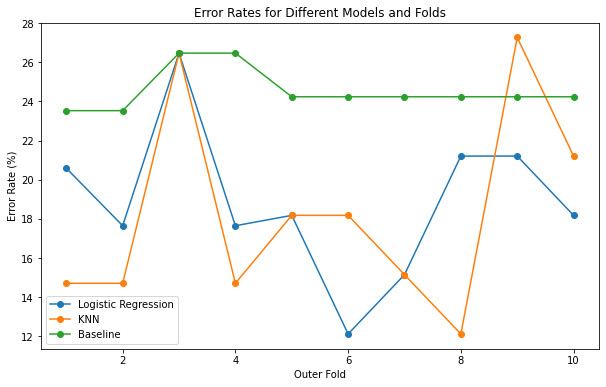

In [28]:
import matplotlib.pyplot as plt

# Data from the table
outer_folds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
log_reg_errors = [20.59, 17.65, 26.47, 17.65, 18.18, 12.12, 15.15, 21.21, 21.21, 18.18]
knn_errors = [14.71, 14.71, 26.47, 14.71, 18.18, 18.18, 15.15, 12.12, 27.27, 21.21]
baseline_errors = [23.53, 23.53, 26.47, 26.47, 24.24, 24.24, 24.24, 24.24, 24.24, 24.24]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(outer_folds, log_reg_errors, marker='o', label='Logistic Regression')
plt.plot(outer_folds, knn_errors, marker='o', label='KNN')
plt.plot(outer_folds, baseline_errors, marker='o', label='Baseline')

# Adding labels and title
plt.xlabel('Outer Fold')
plt.ylabel('Error Rate (%)')
plt.title('Error Rates for Different Models and Folds')
plt.legend()

# Display the plot
plt.show()


In [29]:
results_df

,Model,Selected Parameter,Error Rate,Confidence Interval
0,Logistic Regression,{'C': 10},0.119403,"(0.6426007968722025, 0.9262049072276193)"
1,KNN,{'n_neighbors': 5},0.253731,"(0.6820408597922175, 0.8684047730063563)"
2,Baseline,{},0.253731,"(0.7349181027207354, 0.7741728063701738)"


In [30]:
error_rates = results_df['Error Rate'].values
model1_error=error_rates[0]
model1_error
len(y_test_outer)

67

# McNemar:

In [31]:
from statsmodels.stats.contingency_tables import mcnemar

# Assuming you have the results of your models stored in results_df
# Each row in results_df corresponds to a different model with its error rate

# Extract the error rates and model names
model_names = results_df['Model'].values
error_rates = results_df['Error Rate'].values

# Pairwise comparisons using McNemar's test
for i in range(len(model_names)):
    for j in range(i + 1, len(model_names)):
        model1_name, model2_name = model_names[i], model_names[j]
        model1_error, model2_error = error_rates[i], error_rates[j]

        # Construct the contingency table
        table = [[model1_error * len(y_test_outer), model2_error * len(y_test_outer)],
    [(1 - model1_error) * len(y_test_outer), (1 - model2_error) * len(y_test_outer)]]

        #print(table)
        print(table)
        # Perform McNemar's test
        result = mcnemar(table, exact=False)

        # Print results
        #A low p-value indicates a significant difference in performance between the two models.
        print(mcnemar(table, exact=False, correction=False)) 
        #print(f'{model1_name} vs {model2_name}: p-value = {result.pvalue}')


[[8.0, 16.999999999999996], [59.0, 50.0]]
pvalue      1.4520037175289484e-06
statistic   23.210526315789473
[[8.0, 16.999999999999996], [59.0, 50.0]]
pvalue      1.4520037175289484e-06
statistic   23.210526315789473
[[16.999999999999996, 16.999999999999996], [50.0, 50.0]]
pvalue      5.540038107755643e-05
statistic   16.253731343283583


In [33]:
from statsmodels.stats.contingency_tables import mcnemar

# Assuming you have the results of your models stored in results_df
# Each row in results_df corresponds to a different model with its error rate

# Extract the error rates and model names
model_names = results_df['Model'].values
error_rates = results_df['Error Rate'].values

# Assuming y_test_outer is the true labels for your test set
# You may need to replace this with your actual true labels


# Pairwise comparisons using McNemar's test
for i in range(len(model_names)):
    for j in range(i + 1, len(model_names)):
        model1_name, model2_name = model_names[i], model_names[j]
        model1_error, model2_error = error_rates[i], error_rates[j]

        # Calculate counts for each cell in the contingency table
        a = (1 - model1_error) * (1 - model2_error) * len(y_test_outer)
        b = model1_error * (1 - model2_error) * len(y_test_outer)
        c = (1 - model1_error) * model2_error * len(y_test_outer)
        d = model1_error * model2_error * len(y_test_outer)

        # Construct the contingency table
        table = [[a, b], [c, d]]
        

        # Perform McNemar's test
        result = mcnemar(table, exact=False)

        # Print results
        # A low p-value indicates a significant difference in performance between the two models.
        print(f'{model1_name} vs {model2_name}: p-value = {result.pvalue}')


Logistic Regression vs KNN: p-value = 0.08042421974148416
Logistic Regression vs Baseline: p-value = 0.08042421974148416
KNN vs Baseline: p-value = 0.8426351364638929


In [ ]:
X.head()

# Part for: coefficients (feature importance)

In [10]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you have a DataFrame X_train containing your training features and y_train containing the labels
# X_train, y_train = .\
X_train=X
y_train=y

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train a logistic regression model with 10-fold cross-validation and lambda=0.01
logistic_model = LogisticRegressionCV(Cs=[1/0.1], cv=10)
logistic_model.fit(X_train_scaled, y_train)

# Extract coefficients and corresponding feature names
coefficients = logistic_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to display the coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients to highlight the most influential features
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the sorted DataFrame
print(sorted_coefficients_df)


                    Feature  Coefficient  Absolute_Coefficient
2                   Glucose     0.709768              0.709768
6                       BMI     0.575889              0.575889
7  DiabetesPedigreeFunction     0.525864              0.525864
8                       Age     0.387115              0.387115
1               Pregnancies     0.219998              0.219998
5                   Insulin     0.054250              0.054250
3             BloodPressure     0.054194              0.054194
4             SkinThickness     0.019782              0.019782
0                Unnamed: 0    -0.002551              0.002551


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
